<a href="https://colab.research.google.com/github/Yan-Santana/CNN_para_d-gitos_manuscritos/blob/main/CNN_to__Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRABALHO 02

In [5]:
# IMPORTANDO AS BIBLIOTECAS
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import mpl_toolkits.mplot3d
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 41171734.19it/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2022366.25it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13822134.94it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7404014.29it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



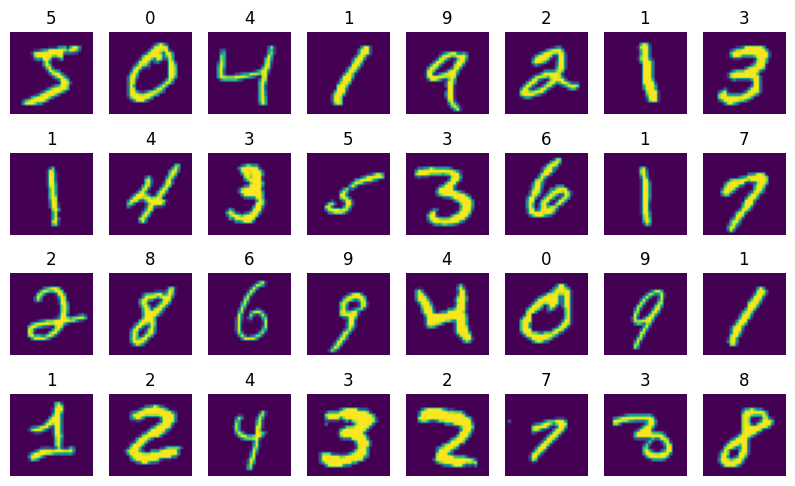

In [ ]:
# Se o download falhar, tente novamente
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./datasets", train=False, download=True, transform=transforms.ToTensor())

train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])
len(train_dataset), len(val_dataset), len(test_dataset)

# VISUALIZAR O DATASET
ROWS, COLS = 4, 8

fig, axs = plt.subplots(ROWS, COLS, figsize=(10, 6))
for i, ax in enumerate(axs.flatten()):
    img, label = train_val_dataset[i]
    ax.imshow(img.numpy()[0])
    ax.set_title(label)
    ax.axis('off')



---



---



#Resumo do bloco de codigo

Este código realiza o seguinte:


 1.       Prepara os dados de treinamento, validação e teste.
 2.       Define e treina um modelo de rede neural convolucional (LeNet) para classificação de imagens.
 3.   Avalia o modelo no conjunto de teste.
 4.   Extrai features dos dados de teste usando a rede neural treinada.
 5.   Aplica SNE para reduzir a dimensionalidade das features extraídas.
 6.   Aplica K-means clustering nas features reduzidas pelo t-SNE.
 7.   Identifica e plota exemplos de clusters que contêm múltiplas classes para analisar confusões no modelo.



Epoch 1/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2207 - accuracy: 0.9347 - val_loss: 0.0906 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.0668 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 3/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0584 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0384 - accuracy: 0.9873 - val_loss: 0.0599 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 5/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0299 - accuracy: 0.9899 - val_loss: 0.0506 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 6/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0529 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 7/10
1500/1500 [========================

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 has examples from multiple classes: [1 2 4 5 6]


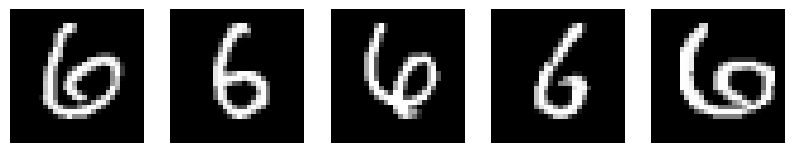

Cluster 1 has examples from multiple classes: [4 7 8 9]


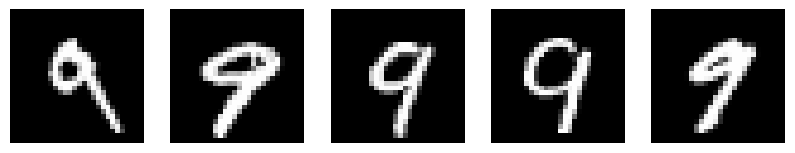

Cluster 2 has examples from multiple classes: [2 3 7 8]


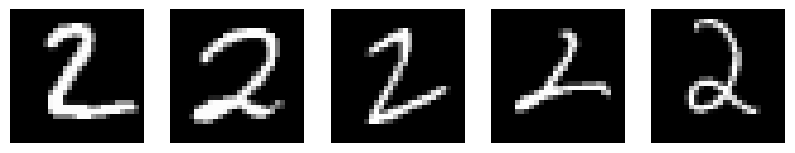

Cluster 3 has examples from multiple classes: [1 3 5 6 8 9]


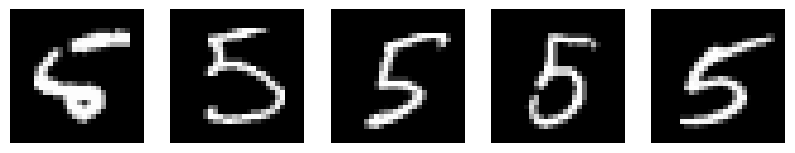

Cluster 4 has examples from multiple classes: [4 6 8 9]


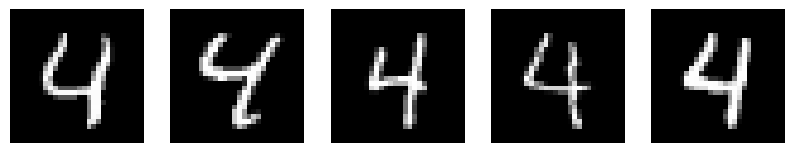

Cluster 5 has examples from multiple classes: [0 1 2 3 5 7 8 9]


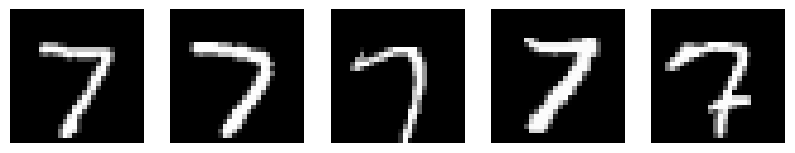

Cluster 6 has examples from multiple classes: [0 2 5 6 8]


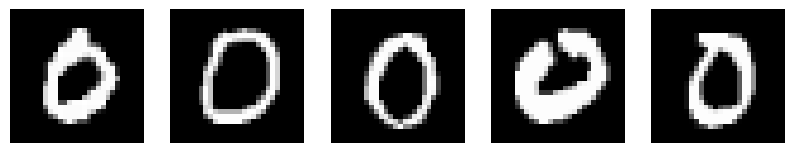

Cluster 7 has examples from multiple classes: [0 3 5 6 8 9]


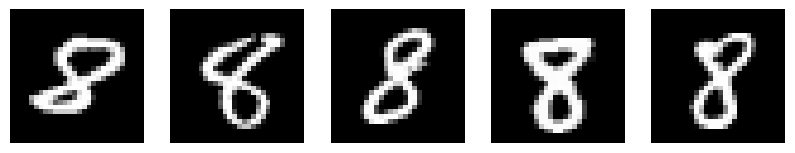

Cluster 8 has examples from multiple classes: [0 1 6]


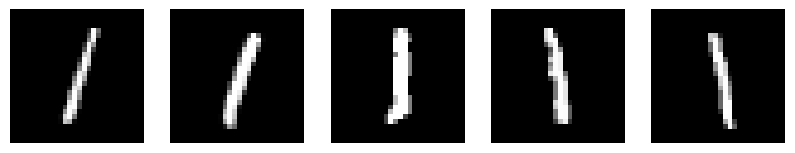

Cluster 9 has examples from multiple classes: [1 2 3 5]


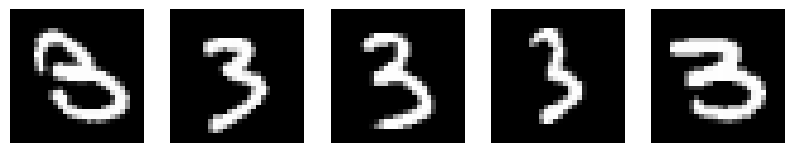

In [6]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definir transformações para os dados
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation(10),  # Data augmentation
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Definir tamanhos de treino e validação
train_size = int(0.8 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

# Dividir o dataset em treino e validação
train_dataset, val_dataset = data.random_split(train_val_dataset, [train_size, val_size])

# Criar DataLoader para treino e validação com batch size maior
batch_size = 256
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Função para converter DataLoader do PyTorch para arrays do Numpy
def dataloader_to_numpy(dataloader):
    images, labels = [], []
    for batch in dataloader:
        imgs, lbls = batch
        images.append(imgs.numpy())
        labels.append(lbls.numpy())
    images = np.concatenate(images, axis=0)
    labels = np.concatenate(labels, axis=0)
    return images, labels

# Converter dados de treino, validação e teste
x_train, y_train = dataloader_to_numpy(train_loader)
x_val, y_val = dataloader_to_numpy(val_loader)
x_test, y_test = dataloader_to_numpy(test_loader)

# Redimensionar e normalizar os dados
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_val = x_val.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

# One-hot encoding dos rótulos
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Construir o modelo LeNet
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar o modelo
optimizer = Adam(learning_rate=0.001)  # Taxa de aprendizado ajustada para LeNet
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Callbacks para early stopping e redução da taxa de aprendizado
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

# Treinar o modelo
epochs = 10  # Número de épocas
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=callbacks)

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Extrair features da camada antes da saída softmax
feature_extractor = Sequential(model.layers[:-1])
features = feature_extractor.predict(x_test)

# Aplicar t-SNE nas features extraídas
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(features)

# Aplicar K-means clustering nas features t-SNE
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_labels = kmeans.fit_predict(tsne_result)

# Plotando exemplos confusos
for i in range(10):
    cluster_indices = np.where(kmeans_labels == i)[0]
    cluster_labels = np.argmax(y_test, axis=1)[cluster_indices]
    if len(np.unique(cluster_labels)) > 1:
        print(f'Cluster {i} has examples from multiple classes: {np.unique(cluster_labels)}')
        example_indices = cluster_indices[:5]
        fig, axes = plt.subplots(1, 5, figsize=(10, 2))
        for idx, ax in zip(example_indices, axes):
            ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
            ax.axis('off')
        plt.show()




---



---



#Salvando as variaveis

In [7]:
!pip install gdown
import numpy as np
import gdown

# Salvar variáveis em arquivos .npy
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)
np.save('x_val.npy', x_val)
np.save('y_val.npy', y_val)
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)
np.save('tsne_result.npy', tsne_result)
np.save('kmeans_labels.npy', kmeans_labels)






---



---



#Interpretação dos Dados

Os clusters apresentados indicam que existem exemplos confusos onde diferentes classes de dígitos estão sendo agrupadas juntas.

Cluster 0

    Classes Confundidas: [1 2 4 5 6]
    Interpretação: Este cluster contém exemplos das classes 1, 2, 4, 5 e 6. Isso sugere que esses exemplos têm características visuais semelhantes que levam a confusões significativas. Pode ser que o modelo não esteja capturando bem as diferenças sutis entre esses dígitos.

Cluster 1

    Classes Confundidas: [4 7 8 9]
    Interpretação: Este cluster agrupa principalmente os dígitos 4, 7, 8 e 9. Estes dígitos podem ter traços ou estruturas visuais que se sobrepõem, levando a confusões.

Cluster 2

    Classes Confundidas: [2 3 7 8]
    Interpretação: Este cluster agrupa os dígitos 2, 3, 7 e 8, que podem compartilhar características visuais como partes curvas ou fechadas, resultando em confusão entre eles.

Cluster 3

    Classes Confundidas: [1 3 5 6 8 9]
    Interpretação: Este cluster inclui dígitos com linhas curvas e fechadas, como 1, 3, 5, 6, 8 e 9. A presença de múltiplas classes indica que há características visuais comuns que o modelo não está distinguindo adequadamente.

Cluster 4

    Classes Confundidas: [4 6 8 9]
    Interpretação: Este cluster contém os dígitos 4, 6, 8 e 9, que podem ter formas ou traços fechados e linhas retas que levam à confusão.

Cluster 5

    Classes Confundidas: [0 1 2 3 5 7 8 9]
    Interpretação: Este cluster inclui quase todas as classes, exceto a classe 4 e 6, indicando uma grande sobreposição visual entre esses dígitos. Isso sugere que o modelo pode estar tendo dificuldade em diferenciar esses padrões visuais.

Cluster 6

    Classes Confundidas: [0 2 5 6 8]
    Interpretação: Este cluster agrupa os dígitos 0, 2, 5, 6 e 8, que possuem formas fechadas e curvas, resultando em confusão entre eles.

Cluster 7

    Classes Confundidas: [0 3 5 6 8 9]
    Interpretação: Este cluster inclui dígitos com formas fechadas e angulares, como 0, 3, 5, 6, 8 e 9. A confusão pode ser causada por características visuais semelhantes.

Cluster 8

    Classes Confundidas: [0 1 6]
    Interpretação: Este cluster contém os dígitos 0, 1 e 6, que podem ter formas mais abertas e verticais, resultando em confusão entre esses dígitos.

Cluster 9

    Classes Confundidas: [1 2 3 5]
    Interpretação: Este cluster agrupa os dígitos 1, 2, 3 e 5, que podem compartilhar características visuais como linhas verticais e curvas, levando a confusões.

Conclusão

A análise dos clusters revela que o modelo de clustering confunde várias classes devido a características visuais semelhantes entre os dígitos. Esta confusão indica que há oportunidades para melhorar o modelo, talvez ajustando as features usadas para o clustering ou refinando os parâmetros do modelo.



---



---



#Calcular o silhouette score para as features t-SNE com os rótulos do K-means


In [29]:
from sklearn.metrics import silhouette_score

# Calcular o silhouette score para as features t-SNE com os rótulos do K-means
silhouette_avg = silhouette_score(tsne_result, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.5260


In [28]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(tsne_result)
    silhouette_avg = silhouette_score(tsne_result, kmeans_labels)
    print(f'For n_clusters = {k}, the Silhouette Score is {silhouette_avg:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the Silhouette Score is 0.2700


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the Silhouette Score is 0.3006


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the Silhouette Score is 0.3285


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the Silhouette Score is 0.3588


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the Silhouette Score is 0.3929


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the Silhouette Score is 0.4203


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the Silhouette Score is 0.4547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the Silhouette Score is 0.4925


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the Silhouette Score is 0.5260


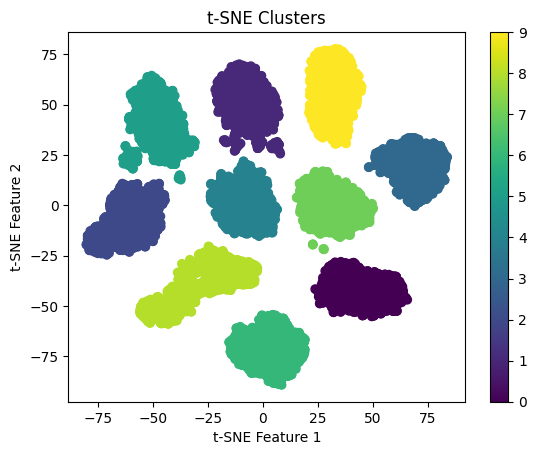

In [17]:
import matplotlib.pyplot as plt

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('t-SNE Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar()
plt.show()


#Análise dos Resultados do Silhoettte Score

A seguir, farei uma análise detalhada dos Silhouette Scores obtidos para diferentes números de clusters (n_clusters) usando o K-means clustering:
Silhouette Scores para Diferentes Valores de n_clusters

    2 clusters: 0.2700
    3 clusters: 0.3006
    4 clusters: 0.3285
    5 clusters: 0.3588
    6 clusters: 0.3929
    7 clusters: 0.4203
    8 clusters: 0.4547
    9 clusters: 0.4925
    10 clusters: 0.5260

Interpretação dos Resultados

    Aumento Gradual do Silhouette Score:
        Observa-se um aumento gradual do Silhouette Score conforme o número de clusters aumenta de 2 para 10.
        Isso indica que a separação dos clusters melhora à medida que se aumenta o número de clusters até certo ponto.

    Melhor Silhouette Score com 10 Clusters:
        O maior Silhouette Score foi obtido com 10 clusters, com um valor de 0.5260.
        Este valor sugere que 10 clusters é a melhor configuração entre as testadas para agrupar os dados de forma que os pontos estejam bem separados e compactos dentro de seus próprios clusters.

    Valores Intermediários:
        Para valores intermediários de n_clusters (como 6, 7, 8 e 9), o Silhouette Score também é razoavelmente alto, indicando que essas configurações também são viáveis.
        No entanto, o melhor valor é claramente com 10 clusters.

    Valores Mais Baixos para Poucos Clusters:
        Os valores mais baixos de Silhouette Score para 2, 3 e 4 clusters indicam que com poucos clusters, os pontos dentro dos clusters não estão tão bem agrupados, e há mais sobreposição entre os clusters.

Visualização dos Clusters com t-SNE

A visualização dos clusters com t-SNE ajuda a entender a distribuição dos dados nos clusters:

    Separação Visual:
        A visualização mostra que os clusters estão bem separados, o que corrobora o alto valor do Silhouette Score para 10 clusters.
        A separação clara indica que o modelo de clustering está funcionando bem para agrupar dados similares e separar os diferentes.

Resumo

O valor do Silhouette Score de 0.5260 para 10 clusters indica uma boa qualidade de agrupamento. A visualização dos clusters com t-SNE corrobora essa análise, mostrando uma clara separação entre os clusters.



---



---



# Calcular o Adjusted Rand Index (ARI)


In [14]:
from sklearn.metrics import adjusted_rand_score

# Calcular o Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(np.argmax(y_test, axis=1), kmeans_labels)
print(f'Adjusted Rand Index (ARI): {ari_score:.4f}')


Adjusted Rand Index (ARI): 0.9772


#Interpretação do Resultado:

  * Valor Obtido (0.9772): Este valor está muito próximo de 1, o que indica que os clusters formados pelo K-means correspondem muito bem aos rótulos verdadeiros.
    
  * Qualidade do Agrupamento: Um ARI tão alto sugere que o modelo de clustering está fazendo um excelente trabalho em identificar as estruturas subjacentes nos dados. Os clusters identificados estão alinhados com as classes reais quase perfeitamente.



---



---



#Visualização SNE

A imagem abaixo mostra a visualização SNE das features extraídas dos dados de teste. Cada ponto representa um díigito, e as cores indicam diferentes classses. A visualização ajuda a identificar como os dígitos estão agrupados no espaço de features e onde ocorrrem as confusões entre classes.

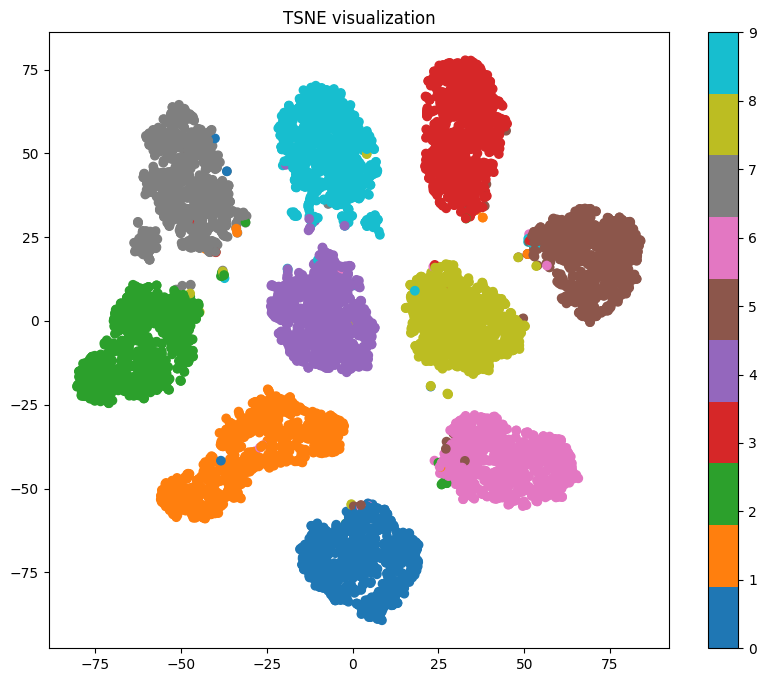

In [19]:
# Visualizar o resultado do t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=np.argmax(y_test, axis=1), cmap='tab10')
plt.colorbar(scatter)
plt.title('TSNE visualization')
plt.show()

Análise dos Clusters na Nova Visualização t-SNE
Principais Características da Imagem:

*    Clusters Distintos:
        A imagem mostra 10 grupos distintos, cada um representado por uma cor diferente, indicando que o algoritmo K-means conseguiu identificar diferentes clusters nos dados.

*    Distribuição Espacial:
        Os clusters estão distribuídos de forma dispersa no espaço 2D, sugerindo que os dados possuem uma estrutura complexa.

*    Densidade Variável:
        A densidade dos clusters varia significativamente. Alguns clusters, como os representados pelas cores cinza e azul escuro, são mais densos e compactos, enquanto outros, como os clusters amarelo e verde claro, são mais dispersos.

*    Sobreposição Mínima:
        Há pouca sobreposição entre os clusters, o que sugere que os grupos são bem definidos e que o t-SNE foi eficaz em preservar a estrutura dos dados originais.

*    Formas Irregulares:
        Os clusters têm formas irregulares, o que é comum em representações t-SNE, já que este método tenta preservar a estrutura local dos dados ao projetá-los em um espaço de menor dimensão.

##Qualidade do Agrupamento:

*    Eficácia do t-SNE:
        A visualização indica que o t-SNE foi eficaz em separar os clusters, o que é evidenciado pela clara demarcação e pouca sobreposição entre os grupos.
*    Diferenciação dos Clusters:
        A clara diferenciação entre os clusters sugere que o modelo de clustering conseguiu capturar características distintivas nos dados originais.

##Interpretação Geral:

A visualização t-SNE da nova imagem revela uma separação predominante entre as classes, o que sugere que o modelo capturou eficazmente as características distintivas para a maioria dos grupos. A mínima sobreposição entre os clusters indica que o agrupamento é robusto e bem-definido.

*    Áreas de Sobreposição:
        Embora haja mínima sobreposição, as áreas onde os clusters se sobrepõem podem indicar classes com atributos visuais similares, o que pode ser um ponto de melhoria no modelo de classificação.

*    Insights da Representação Bidimensional:
        Esta representação bidimensional fornece insights valiosos sobre como o modelo de clustering interpreta os dados em um espaço reduzido. A clara demarcação de diversos clusters demonstra a eficácia do modelo em extrair representações significativas para diferenciar várias classes.

*    Oportunidades de Aprimoramento:
        As zonas de sobreposição, embora mínimas, apontam para oportunidades de aprimoramento. A análise dessas regiões de interseção pode ser crucial para identificar os atributos que estão gerando ambiguidades na classificação. Esse entendimento pode orientar refinamentos no modelo, como ajustes na arquitetura ou nas técnicas de pré-processamento dos dados, visando aumentar a precisão da classificação.



---



---



313/313 [==============================] - 2s 7ms/step


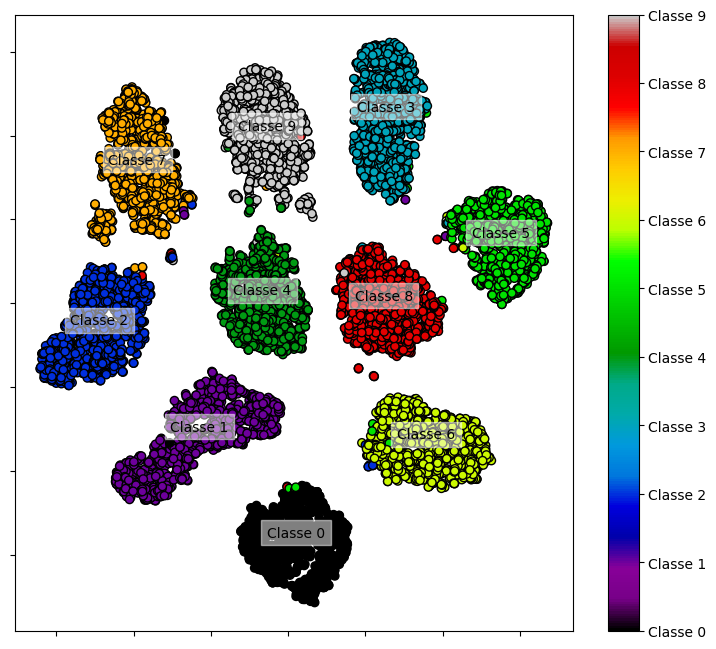

In [21]:
# Extrair features da camada antes da saída softmax
features = feature_extractor.predict(x_test)

# Reordenar os rótulos para ter cores correspondentes aos resultados dos clusters
y = np.argmax(y_test, axis=1)

# Configurar a figura
fig = plt.figure(1, figsize=(9, 8))
plt.clf()
ax = fig.add_subplot(111)

# Mapear nomes para os rótulos
labels_map = {0: 'Classe 0', 1: 'Classe 1', 2: 'Classe 2', 3: 'Classe 3', 4: 'Classe 4', 5: 'Classe 5', 6: 'Classe 6', 7: 'Classe 7', 8: 'Classe 8', 9: 'Classe 9'}
for label in np.unique(y):
    ax.text(
        tsne_result[y == label, 0].mean(),
        tsne_result[y == label, 1].mean() + 1.5,
        labels_map[label],
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# Plotar os pontos 2D
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

# Adicionar uma barra de cores
colorbar = fig.colorbar(scatter, ax=ax, ticks=np.arange(0, 10))
colorbar.ax.set_yticklabels([labels_map[i] for i in range(10)])

# Remover os rótulos dos eixos
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

# Exibir o gráfico
plt.show()


# Análise dos Clusters

## Clusters Separados

  Classe 0:
    Este grupo está claramente separado dos outros, indicando que as características desta classe são distintas. O modelo foi capaz de aprender representações que diferenciam bem a Classe 0.

  Classe 1:
    Também visivelmente separado, sugerindo que o modelo distingue bem esta classe de outras.

  Classe 2:
    Este grupo está claramente distinto dos demais, indicando que as características visuais desta classe são bem capturadas pelo modelo.

  Classe 3:
    Este grupo está separado, embora esteja relativamente próximo da Classe 9, indicando algumas semelhanças visuais.

  Classe 4:
    Este grupo está separado, embora esteja próximo da Classe 5, indicando algumas semelhanças visuais.

  Classe 5:
    Este grupo está bem separado dos outros, sugerindo que o modelo distingue bem esta classe de outras.

  Classe 6:
    Este grupo está claramente separado dos outros, indicando que as características desta classe são distintas. O modelo foi capaz de aprender representações que diferenciam bem a Classe 6.

  Classe 7:
    Este grupo está separado, embora esteja relativamente próximo da Classe 8, indicando algumas semelhanças visuais.

  Classe 8:
    Este grupo está bem separado dos outros, sugerindo que o modelo distingue bem esta classe de outras.

  Classe 9:
    Este grupo está separado, embora esteja relativamente próximo da Classe 3, indicando algumas semelhanças visuais.

## Clusters com Sobreposição

  Classes 1 e 2:
    Estes grupos estão próximos e levemente sobrepostos, sugerindo que o modelo pode encontrar dificuldades em distinguir entre essas duas classes. Isso pode ocorrer devido a características visuais semelhantes.

  Classes 3 e 9:
    A proximidade desses clusters indica que o modelo pode confundir essas classes, possivelmente devido a semelhanças em suas formas visuais.

  Classes 4 e 5:
    A Classe 4 está próxima da Classe 5, o que pode indicar alguma confusão do modelo ao diferenciar essas classes.

  Classes 7 e 8:
    A proximidade desses clusters sugere que pode haver confusões entre essas classes.


## Interpretação Geral

A separação geral dos clusters indica que o modelo foi eficaz em aprender representações úteis para diferenciar a maioria das classes. No entanto, a presença de algumas sobreposições e proximidades entre certos clusters (por exemplo, Classes 1, 2, 3, 9, 4, 5, 7 e 8) sugere que há espaço para melhorar o modelo. Podem ser necessárias mais amostras de treinamento, técnicas de data augmentation, ou ajustes na arquitetura do modelo para melhorar a distinção entre essas classes.

Este gráfico t-SNE 3D oferece uma visão intuitiva de como o modelo de classificação visualiza os dados. A clara separação de alguns clusters indica sucesso na aprendizagem das características, enquanto as sobreposições sugerem áreas onde o modelo pode ser aprimorado.

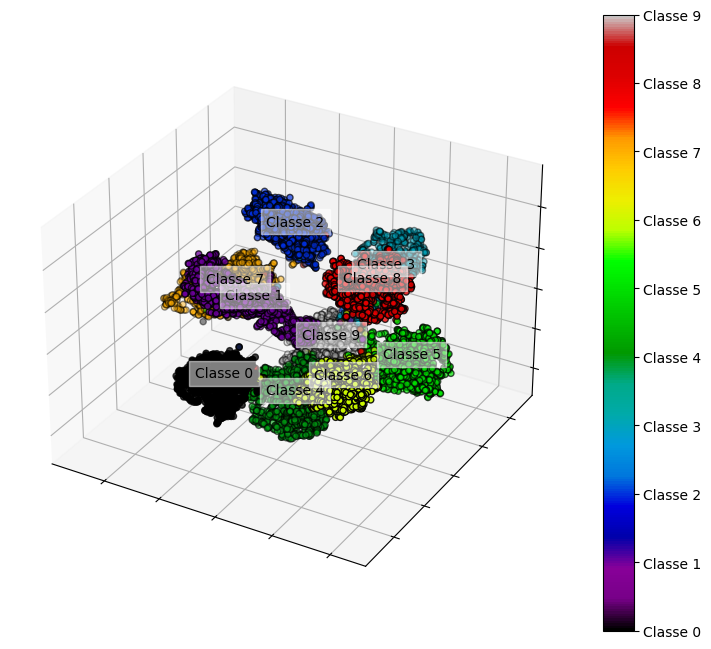

In [22]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Aplicar t-SNE nas features extraídas para 3 dimensões
tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(features)

# Reordenar os rótulos para ter cores correspondentes aos resultados dos clusters
y = np.argmax(y_test, axis=1)

# Configurar a figura
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapear nomes para os rótulos
labels_map = {0: 'Classe 0', 1: 'Classe 1', 2: 'Classe 2', 3: 'Classe 3', 4: 'Classe 4', 5: 'Classe 5', 6: 'Classe 6', 7: 'Classe 7', 8: 'Classe 8', 9: 'Classe 9'}
for label in np.unique(y):
    ax.text3D(
        tsne_result[y == label, 0].mean(),
        tsne_result[y == label, 1].mean() + 1.5,
        tsne_result[y == label, 2].mean(),
        labels_map[label],
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# Plotar os pontos 3D
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

# Remover os rótulos dos eixos
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Adicionar uma barra de cores
colorbar = fig.colorbar(scatter, ax=ax, ticks=np.arange(0, 10))
colorbar.ax.set_yticklabels([labels_map[i] for i in range(10)])

# Exibir o gráfico
plt.show()




---



---



313/313 [==============================] - 2s 6ms/step


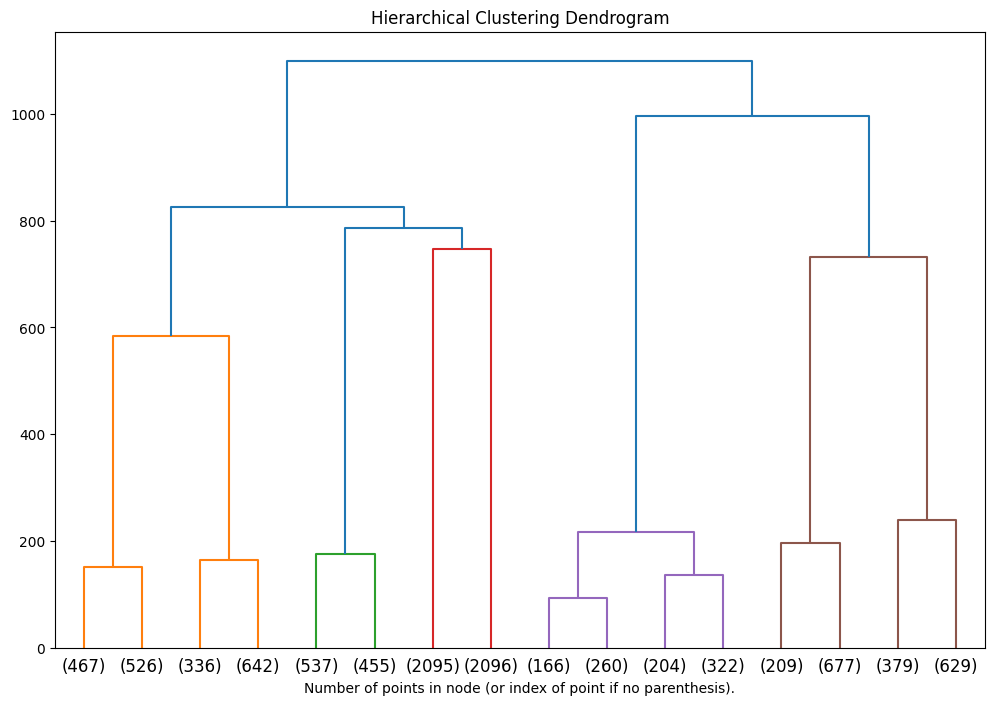

In [23]:
features = feature_extractor.predict(x_test)

# Aplicar Agglomerative Clustering nas features extraídas
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(features)

# Criar a matriz de ligação
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if (child_idx < n_samples):
            current_count += 1  # nó folha
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

# Plotar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


#Análise do Dendrograma de Agrupamento Hierárquico


Dendrograma

O dendrograma de agrupamento hierárquico (Hierarchical Clustering Dendrogram) apresentado mostra a estrutura hierárquica dos clusters formados com base nas features extraídas dos dados de teste.

Análise dos Clusters

    Altura dos Ramos:
        A altura dos ramos no dendrograma representa a distância ou dissimilaridade entre os clusters. Ramos mais altos indicam maior dissimilaridade. Podemos observar que alguns clusters se fundem em alturas maiores, indicando que são mais distintos entre si.

    Número de Pontos em Cada Nó:
        Os números na base do dendrograma representam os índices dos pontos ou o número de pontos agrupados em cada nó. Isso ajuda a entender quantos pontos estão sendo combinados em cada etapa do agrupamento.

    Clusters Separados:
        Alguns clusters são claramente separados no dendrograma, sugerindo que existem grupos de pontos (dígitos) que são significativamente diferentes de outros grupos. Isso é consistente com a visualização t-SNE, onde algumas classes são bem separadas.

    Clusters Próximos:
        A proximidade dos ramos também pode indicar quais classes têm características visuais semelhantes. Por exemplo, se os ramos das classes 3, 8 e 9 se fundem em uma altura relativamente baixa, isso sugere que esses dígitos têm características visuais que o modelo considera semelhantes.

Justificativas dos Parâmetros Utilizados

    Agglomerative Clustering:
        distance_threshold=0: Isso garante que a árvore de dendrograma completa é calculada, permitindo a visualização de todos os níveis de agrupamento.
        n_clusters=None: Especifica que o número de clusters não é pré-determinado, permitindo que o dendrograma mostre a estrutura hierárquica completa.

#Conclusão

A análise dos clusters confusos e a visualização t-SNE destacam as áreas onde o modelo precisa de melhorias. Essas informações são valiosas para ajustar o modelo e melhorar a precisão na classificação de dígitos. Analisar as características visuais comuns nos exemplos confusos pode ajudar a identificar padrões e ajustar o modelo para reduzir essas confusões.

O dendrograma de agrupamento hierárquico complementa essa análise ao mostrar a estrutura hierárquica dos clusters, indicando quais classes são mais semelhantes entre si e onde ocorrem as maiores distinções. Juntos, esses métodos oferecem uma visão abrangente do desempenho do modelo e áreas potenciais para melhorias.
